In [2]:
######  ABORDAGEM PROVISIONADA  #######

import pandas as pd
spam_ds = pd.read_csv("spam_dataset.csv")

In [3]:
spam_ds.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
len(spam_ds)

5572

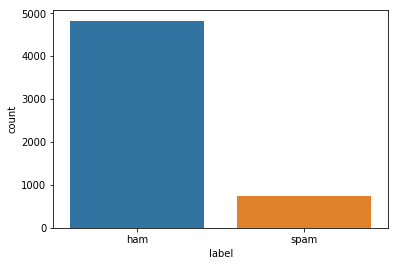

In [6]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='label', data=spam_ds)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vect_model = count_vectorizer.fit(spam_ds['message'])

In [8]:
x = count_vect_model.transform(spam_ds['message'])
y = spam_ds["label"].values

In [9]:
x

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [10]:
count_vect_model.vocabulary_

{'three': 7736,
 'amy': 1091,
 'okmail': 5545,
 'official': 5524,
 'yi': 8658,
 'arun': 1236,
 'idew': 4061,
 'explosive': 3084,
 'based': 1413,
 'lnly': 4700,
 'liquor': 4674,
 'duffer': 2811,
 'meanwhile': 4977,
 'steam': 7284,
 'studio': 7365,
 'txt82228': 7989,
 'gives': 3554,
 'thinl': 7715,
 '7th': 728,
 'arrive': 1227,
 'fidalfication': 3195,
 'upcharge': 8088,
 'asking': 1251,
 '83383': 767,
 'behalf': 1489,
 'scool': 6699,
 'module': 5133,
 'bed': 1468,
 'sipix': 6962,
 'itxt': 4256,
 'alertfrom': 1029,
 'bus': 1787,
 'win': 8463,
 'tncs': 7805,
 'anything': 1142,
 'ahhh': 999,
 'evn': 3034,
 'icicibank': 4050,
 'morphine': 5169,
 'cine': 2061,
 'maat': 4838,
 'breathe1': 1705,
 'premier': 6064,
 'opt': 5598,
 'knows': 4475,
 'christmas': 2055,
 'babyjontet': 1359,
 'scared': 6689,
 'checked': 1991,
 'excuse': 3054,
 'dem': 2537,
 'path': 5759,
 'belly': 1499,
 'regalportfolio': 6382,
 'wahay': 8272,
 'attention': 1290,
 'travelling': 7912,
 'application': 1168,
 'listening': 

In [19]:
#treinar o modelo
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = .2, random_state=25)

In [16]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_treino, y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
# rodando o modelo no dataset de teste.
predicted = clf.predict(x_teste)

In [28]:
### testando.....
msg = "Congrats! 1 year special cinema "

msg_features = count_vect_model.transform([msg])
result = clf.predict(msg_features)[0]

In [29]:
print(result)

ham


In [30]:
from sklearn import metrics
print(  metrics.classification_report(y_teste, predicted))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99       958
       spam       0.94      0.95      0.95       157

avg / total       0.98      0.98      0.98      1115



In [43]:
from sklearn import model_selection

clf2 = MultinomialNB()

predicted = model_selection.cross_val_predict(clf2, x , y, cv=10)

In [44]:
print( metrics.classification_report(y,predicted))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      4825
       spam       0.92      0.95      0.93       747

avg / total       0.98      0.98      0.98      5572



In [47]:
pd.crosstab(predicted,y)

col_0,ham,spam
row_0,,
ham,4763,38
spam,62,709


In [ ]:
###########################################################################################

In [48]:
import pandas as pd
sentimento_ds = pd.read_csv("sentimento_dataset_v2.csv")

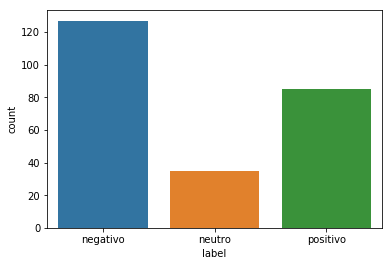

In [49]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='label', data=sentimento_ds)

In [50]:
sentimento_ds.head()

,titulo,label
0,Adolescente de anos é apreendido com pistola ...,negativo
1,Empresário e esposa são mortos a tiros na fren...,negativo
2,Restaurante é assaltado por três homens armado...,negativo
3,Crianças são atropeladas em passeio com a mãe ...,negativo
4,"Após assalto, servidores de agência do Detran-...",negativo


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vect_model = count_vectorizer.fit(sentimento_ds['titulo'])

In [74]:
x = count_vect_model.transform(sentimento_ds['titulo'])
y = sentimento_ds["label"].values

In [75]:
#treinar o modelo
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = .2, random_state=25)

In [109]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_treino, y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
predicted = clf.predict(x_teste)

In [105]:
from sklearn import model_selection

clf2 = MultinomialNB()

predicted = model_selection.cross_val_predict(clf2, x , y, cv=10)

In [106]:
print( metrics.classification_report(y,predicted))

             precision    recall  f1-score   support

   negativo       0.79      0.85      0.82       127
     neutro       0.60      0.43      0.50        35
   positivo       0.66      0.67      0.67        85

avg / total       0.72      0.73      0.72       247



In [103]:
### testando.....
titulo = "Picciani, ladrão safado !!"

titulo_features = count_vect_model.transform([titulo])
result = clf2.predict(titulo_features)[0]

NameError: name 'titulo' is not defined